<div style="text-align: center; font-size: 36px;">
    Student Pledge
</div>

By answering the questions in this notebook, I pledge that I will **not use any AI tools or external sources** to assist me in completing this exam. I affirm that the work submitted is entirely my own and was completed without any form of plagiarism or external help. I understand that any violation of these terms will result in **serious consequences** as per the institute's policy.

I agree to the above terms and conditions by submitting this notebook.

---

### Important:
- You **must not delete** this cell or any part of this notebook.
- All answers **must be written below** the respective cells for each question.
- **Deleting or altering this cell** will result in **your submission not being accepted**.
- Submit the same notebook file with your code solutions.

## Name: M Praveen Kumar
### Roll Num: P2522036

## **Instructions**

1. **Submission Guidelines**:
   - Complete the project in the provided Jupyter Notebook file only. Submissions in any other format (e.g., `.zip`, `.py`) will not be accepted.
   - Mention your **Name** and **Roll Number** clearly at the top of the notebook.
   - Write inferences in the text cells provided below each solution. Ensure clarity and precision in your explanations.
   - **Last date to submit project**: 10 Jan 2026 (EoD).

   

---

## Marks Distribution
- Total Marks: 15  
  - Question 1 → 5 Marks (CO1 / PO1)  
  - Question 2 → 5 Marks (CO2 / PO2)  
  - Question 3 → 5 Marks (CO3 / PO2)

---

# Case Study: Promotion Decision System at NexaCore Solutions

You are a **Data Scientist** at *NexaCore Solutions*, a multinational organization with a geographically distributed workforce and diverse functional units. The company invests heavily in employee training, performance evaluation, and leadership development programs.

Despite a well-defined promotion policy, recent internal audits have uncovered **significant inconsistencies in promotion outcomes** across departments and regions. Senior leadership has raised concerns regarding:
- Unequal promotion probabilities for employees with similar performance profiles  
- Department-level subjectivity and favoritism  
- Lack of transparency in promotion decisions  

To eliminate bias and introduce accountability, the organization has decided to implement a **machine learning–driven promotion recommendation system**.

---

## Problem Statement

Your task is to build a **binary classification system** that predicts:

> **Whether an employee should be promoted (`is_promoted = 1`) or not (`is_promoted = 0`)**

based on historical employee data.

The system will serve as a **decision-support tool** for the HR department and will directly influence promotion recommendations.

---

## Dataset Description

The dataset contains the following attributes:

| Variable | Description |
|--------|-------------|
| employee_id | Unique employee identifier |
| department | Functional department |
| region | Region of employment |
| education | Highest qualification |
| gender | Gender |
| recruitment_channel | Hiring source |
| no_of_trainings | Number of training programs attended |
| age | Age of the employee |
| previous_year_rating | Performance rating in the previous year |
| length_of_service | Total years with the organization |
| awards_won? | Whether any award was received |
| avg_training_score | Average training performance |
| is_promoted | **Target variable** |

---

## Critical Constraint: One-Shot Analysis

This project operates under **strict operational constraints**:

- The entire pipeline runs on **cloud infrastructure**, incurring **significant computation and storage costs**.
- **There is no opportunity to re-run EDA, data preparation, or model training**.
- Any missed insight, anomaly, or data issue **cannot be rectified later**.
- Errors in modeling may lead to **financial loss, reputational damage, and unfair promotion decisions**.

Therefore, **every step—from data preparation to model selection—is mission-critical**.

---

## Exploratory Data Analysis (EDA) — Mandatory and Exhaustive

A **thorough and complete EDA** is expected.

- All **patterns, anomalies, class imbalance issues, relationships, and distributional characteristics** must be identified.
- EDA findings must directly inform **feature handling, preprocessing, and model choice**.
- Missing or ignored insights will propagate errors into downstream models and are considered **analytical negligence**.

---

## Modeling Strategy

Based strictly on insights derived from EDA, you must follow a **structured modeling approach**:

### 1. Single (Baseline) Models
Build and evaluate individual classifiers such as:
- **Logistic Regression**
- **Decision Tree Classifier**

These models will establish baseline performance and interpretability.

---

### 2. Ensemble Models

To improve generalization and robustness, implement and compare the following ensemble techniques:

- **Bagging-based Ensembles**  
  - Focus on variance reduction  
  - Useful when base learners overfit  

- **Boosting-based Ensembles**  
  - Focus on correcting previous errors  
  - Useful for learning complex decision boundaries  

- **Voting-based Ensembles**  
  - Combine heterogeneous models  
  - Useful for balancing bias–variance trade-offs  

Each ensemble must be justified in terms of **why it is suitable for this dataset**.

---

### 3.  Model Evaluation and Risk Assessment

Models must be evaluated using:
- Cross-validation performance  
- Stability across folds  
- Train vs validation behavior (overfitting detection)  
- Performance on unseen test data  

A model with high accuracy but poor generalization **cannot be deployed**.

---

#### Final Recommendation (Mandatory)

You must **recommend exactly one model for deployment**, supported by:

- Evidence from EDA  
- Comparative performance across single and ensemble models  
- Overfitting and stability analysis  
- Suitability under **high-cost, no-retraining constraints**  

The chosen model must demonstrate:
- Strong generalization  
- Stable cross-validation behavior  
- Minimal risk of failure in production  

---

## Key Principle

> In a real-world, cloud-based system, **accuracy alone is insufficient**.  
> The deployable model must be **robust, stable, and defensible**.

---

Failure to justify any step in the pipeline may result in **biased promotion outcomes and irreversible operational costs**.



In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder


import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")


In [14]:
df = pd.read_csv(r"HR.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [15]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [16]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

We have 2 Features - Education & Previous_year_rating that has null Values - Blanks

In [17]:
import numpy as np

# We are imputing "naN" to Blank Values
invalid_zero_cols = ['education', 'previous_year_rating']
df[invalid_zero_cols] = df[invalid_zero_cols].replace("", np.nan)

In [18]:
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,49,0


Imputation - NaN is done

# Heatmap

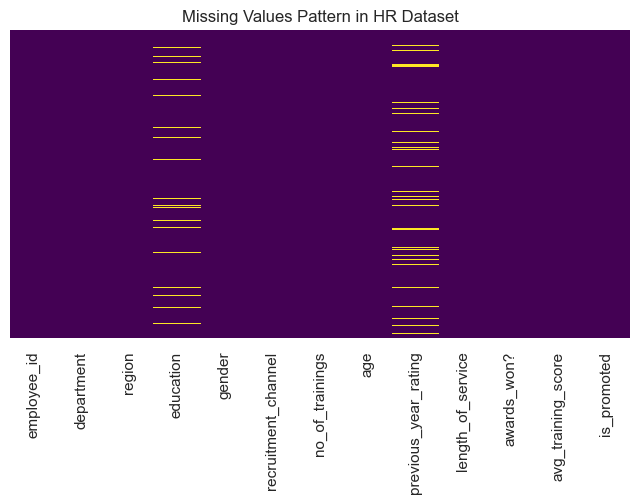

In [19]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Missing Values Pattern in HR Dataset")
plt.show()

# Typecasting

In [20]:
# Typecasting

df['department'] = df['department'].astype('category')
df['gender'] = df['gender'].astype('category')
df['region'] = df['region'].astype('category')
df['education'] = df['education'].astype('category')
df['recruitment_channel'] = df['recruitment_channel'].astype('category')

df['is_promoted'] = df['is_promoted'].astype('category')

In [21]:
df.rename(columns={'awards_won?':'awards_won'},inplace=True)

In [22]:
# Dropping ID column as it is not relevant here
df = df.drop(columns=['employee_id'])

In [23]:
df.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

We have 11 Independent Features and 1 Target Feature

Numeric Independent features: ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score']

Categorical Independent features: ['department', 'region', 'education', 'gender', 'recruitment_channel']

Target Feature - is_promoted

# class distribution of is_promoted

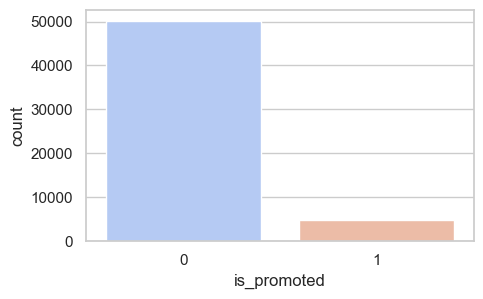

In [24]:

plt.figure(figsize=(5, 3))
sns.countplot(x='is_promoted', data= df, palette="coolwarm")
plt.show()  

**As we are not allowed to retrain the model - we are using Ensemble Models and Techniques to get the maximum accuracy without overfitting.**

**Voting Classifier, Bagging and Boosting Techniques** are good at Generalization.

# univariate analysis

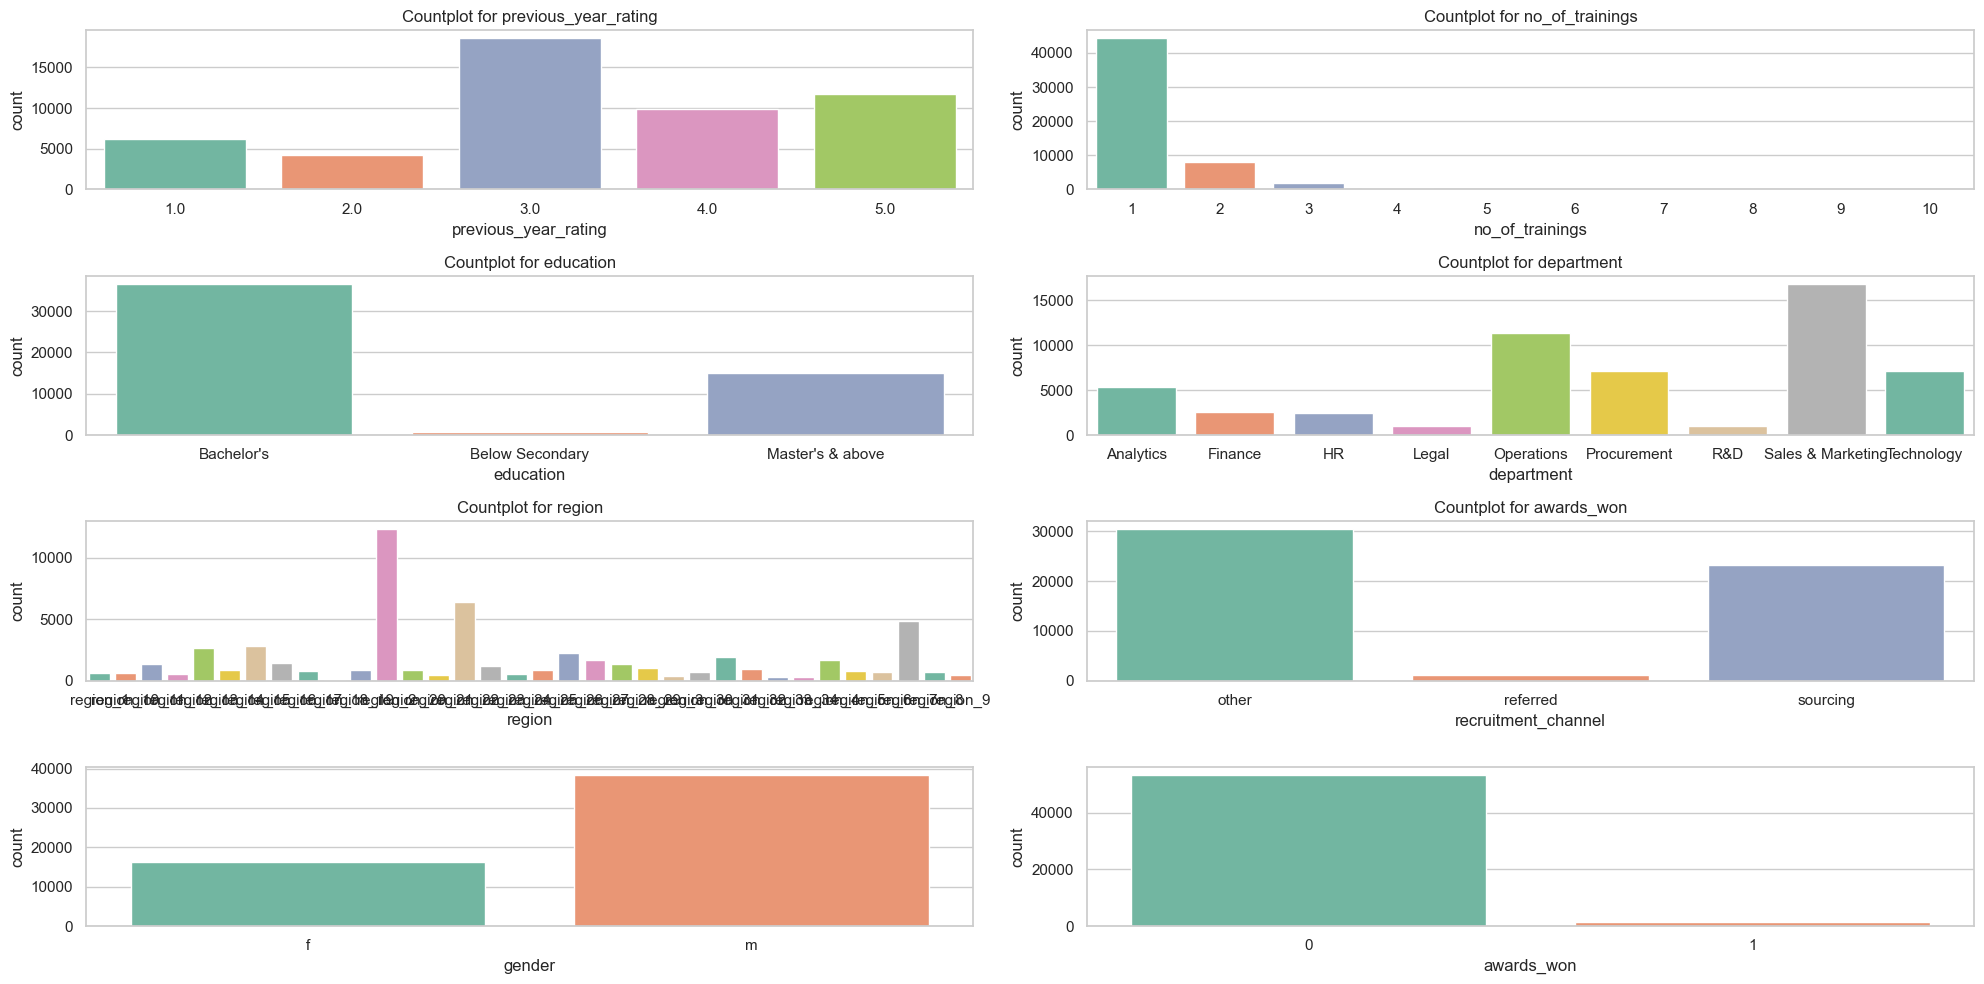

In [25]:


fig, axes = plt.subplots(4, 2, figsize=(20, 10))
sns.set(style="whitegrid")

# Subplot 1: Seasons
sns.countplot(data=df, x='previous_year_rating', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Countplot for previous_year_rating')

# Subplot 2: Education
sns.countplot(data=df, x='no_of_trainings', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Countplot for no_of_trainings')

# Subplot 3: Seasons
sns.countplot(data=df, x='education', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Countplot for education')

# Subplot 4: Education
sns.countplot(data=df, x='department', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Countplot for department')

# Subplot 5: Social smoker
sns.countplot(data=df, x='region', ax=axes[2, 0], palette='Set2')
axes[2, 0].set_title('Countplot for region')

# Subplot 6: Social drinker
sns.countplot(data=df, x='recruitment_channel', ax=axes[2, 1], palette='Set2')
axes[2, 1].set_title('Countplot for recruitment_channel')

# Subplot 6: Social drinker
sns.countplot(data=df, x='gender', ax=axes[3, 0], palette='Set2')
axes[2, 1].set_title('Countplot for gender')

sns.countplot(data=df, x='awards_won', ax=axes[3, 1], palette='Set2')
axes[2, 1].set_title('Countplot for awards_won')

# Adjust layout
plt.tight_layout()
plt.show()

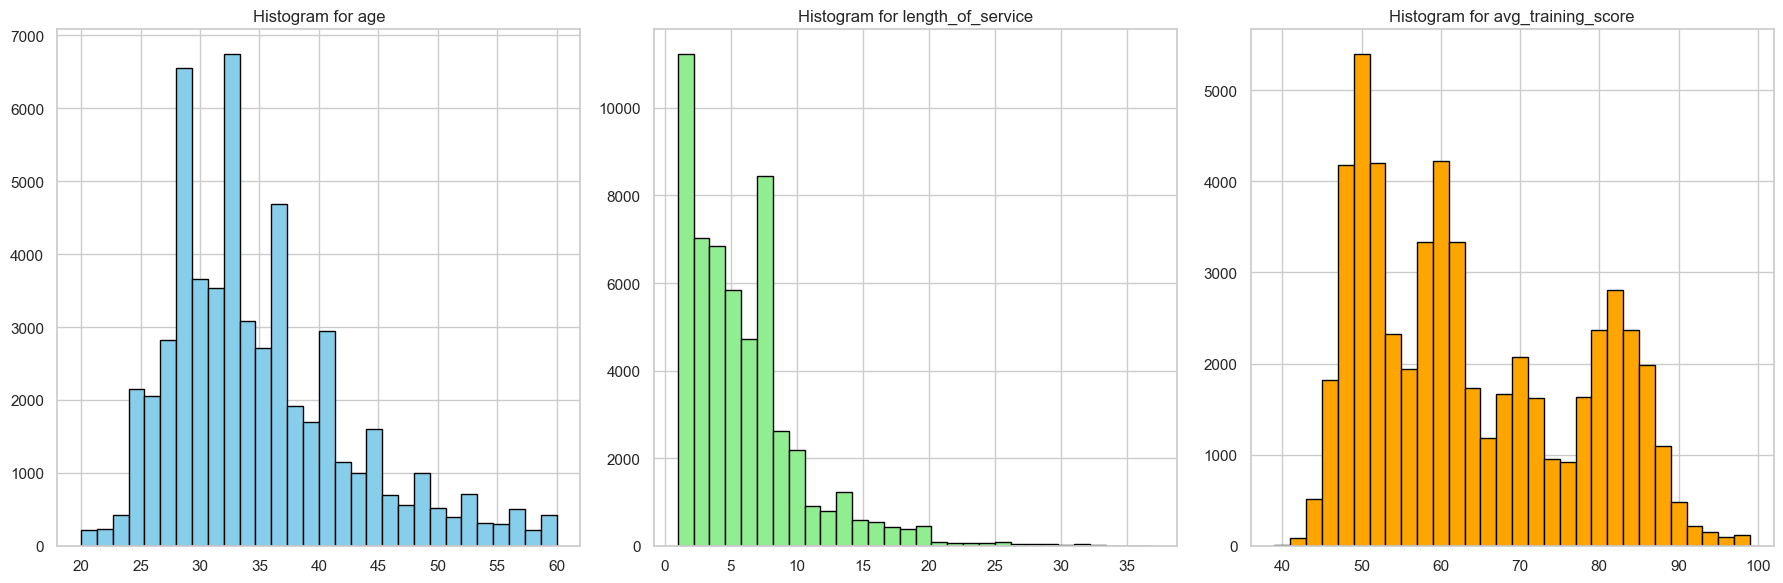

In [26]:
#Univariate Analysis

sns.set(style='whitegrid')

# Create subplots (1 rows, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram 1: Age
axes[0].hist(df['age'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram for age')

# Histogram 2: Distance from Residence to Work
axes[1].hist(df['length_of_service'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Histogram for length_of_service')

# Histogram 3: Work load Average/day                    
axes[2].hist(df['avg_training_score'], bins=30, color='orange', edgecolor='black')
axes[2].set_title('Histogram for avg_training_score')


# Adjust layout
plt.tight_layout()
plt.show()


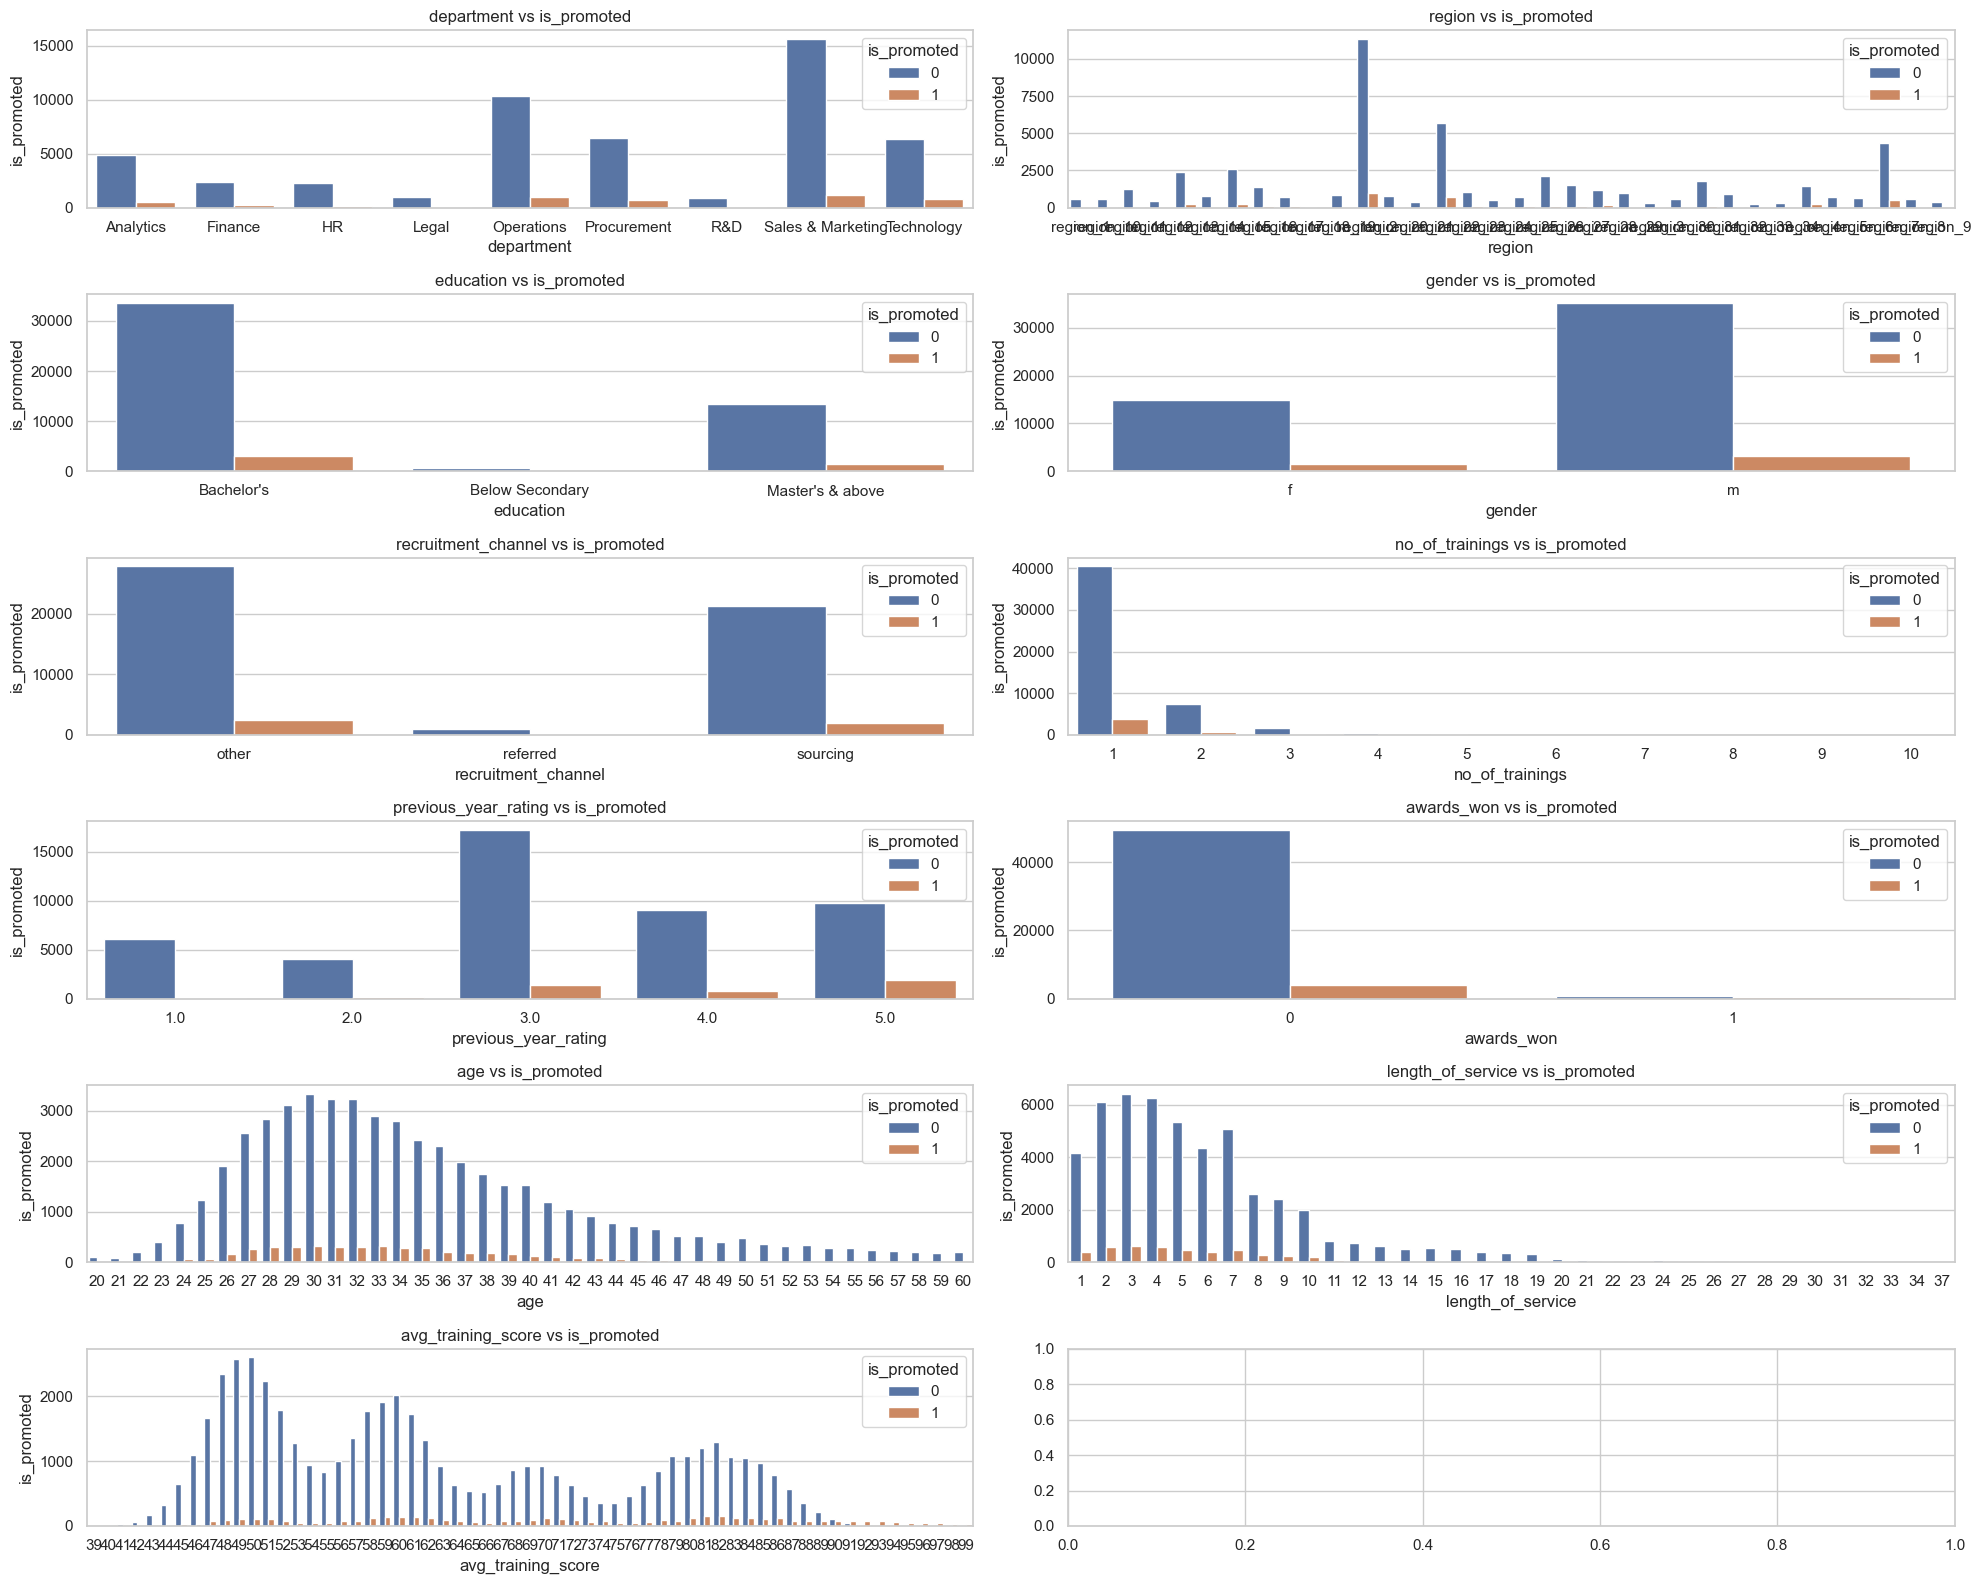

In [27]:
# Bivariate analysis

sns.set(style='whitegrid')

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(6, 2, figsize=(20, 16))

# Plot 1: Department vs is_promoted
sns.countplot(data=df, x='department', hue='is_promoted', ax=axes[0, 0])
axes[0, 0].set_title('department vs is_promoted')
axes[0, 0].set_xlabel('department')
axes[0, 0].set_ylabel('is_promoted')

# Plot 2: region vs is_promoted
sns.countplot(data=df, x='region', hue='is_promoted', ax=axes[0, 1])
axes[0, 1].set_title('region vs is_promoted')
axes[0, 1].set_xlabel('region')
axes[0, 1].set_ylabel('is_promoted')

# Plot 3: education vs is_promoted
sns.countplot(data=df, x='education', hue='is_promoted', ax=axes[1, 0])
axes[1, 0].set_title('education vs is_promoted')
axes[1, 0].set_xlabel('education')
axes[1, 0].set_ylabel('is_promoted')

# Plot 4: gender vs is_promoted
sns.countplot(data=df, x='gender', hue='is_promoted', ax=axes[1, 1])
axes[1, 1].set_title('gender vs is_promoted')
axes[1, 1].set_xlabel('gender')
axes[1, 1].set_ylabel('is_promoted')

# Plot 4: recruitment_channel vs is_promoted
sns.countplot(data=df, x='recruitment_channel', hue='is_promoted', ax=axes[2, 0])
axes[2, 0].set_title('recruitment_channel vs is_promoted')
axes[2, 0].set_xlabel('recruitment_channel')
axes[2, 0].set_ylabel('is_promoted')

# Plot 4: no_of_trainings vs is_promoted
sns.countplot(data=df, x='no_of_trainings', hue='is_promoted', ax=axes[2, 1])
axes[2, 1].set_title('no_of_trainings vs is_promoted')
axes[2, 1].set_xlabel('no_of_trainings')
axes[2, 1].set_ylabel('is_promoted')

# Plot 4: previous_year_rating vs is_promoted
sns.countplot(data=df, x='previous_year_rating', hue='is_promoted', ax=axes[3, 0])
axes[3, 0].set_title('previous_year_rating vs is_promoted')
axes[3, 0].set_xlabel('previous_year_rating')
axes[3, 0].set_ylabel('is_promoted')

# Plot 4: awards_won vs is_promoted
sns.countplot(data=df, x='awards_won', hue='is_promoted', ax=axes[3, 1])
axes[3, 1].set_title('awards_won vs is_promoted')
axes[3, 1].set_xlabel('awards_won')
axes[3, 1].set_ylabel('is_promoted')

# Plot 4: age vs is_promoted
sns.countplot(data=df, x='age', hue='is_promoted', ax=axes[4, 0])
axes[4, 0].set_title('age vs is_promoted')
axes[4, 0].set_xlabel('age')
axes[4, 0].set_ylabel('is_promoted')

# Plot 4: length_of_service vs is_promoted
sns.countplot(data=df, x='length_of_service', hue='is_promoted', ax=axes[4, 1])
axes[4, 1].set_title('length_of_service vs is_promoted')
axes[4, 1].set_xlabel('length_of_service')
axes[4, 1].set_ylabel('is_promoted')

# Plot 4: avg_training_score vs is_promoted
sns.countplot(data=df, x='avg_training_score', hue='is_promoted', ax=axes[5, 0])
axes[5, 0].set_title('avg_training_score vs is_promoted')
axes[5, 0].set_xlabel('avg_training_score')
axes[5, 0].set_ylabel('is_promoted')

# Layout
plt.tight_layout()
plt.show()



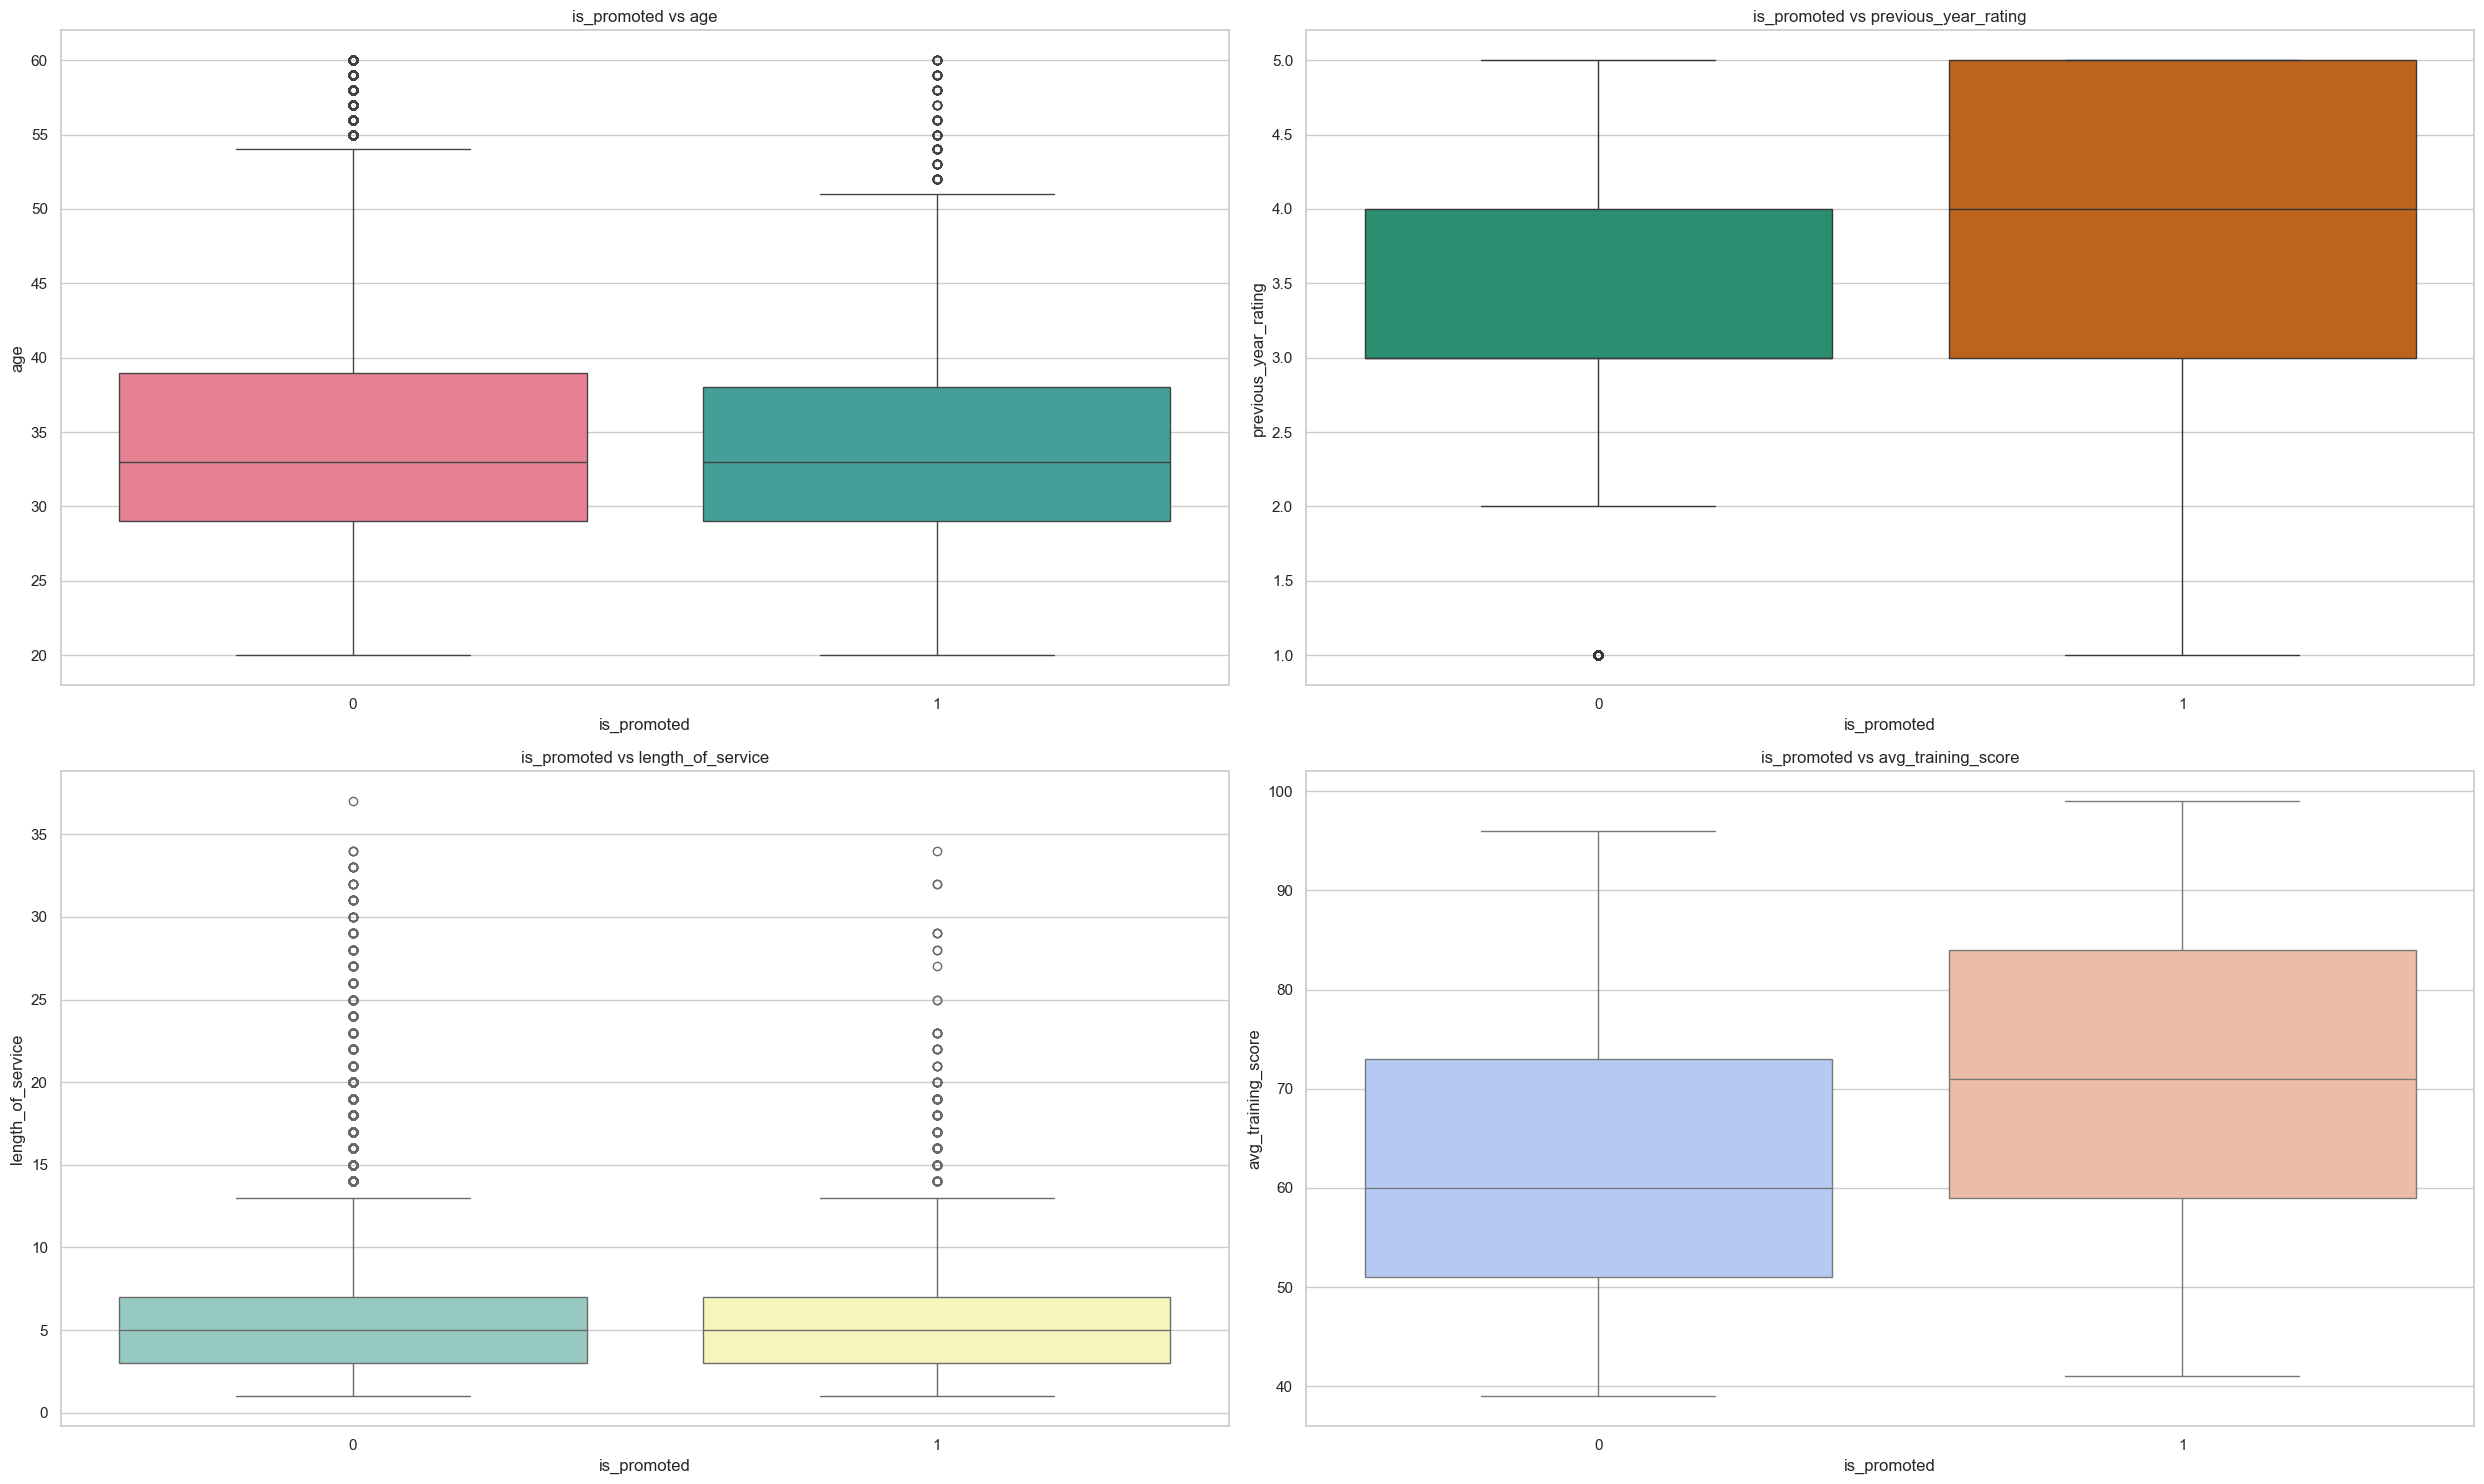

In [28]:
import seaborn as sns

# Create 3x2 subplot grid- boxplots
fig, axes = plt.subplots(2, 2, figsize=(25, 15))

# Flatten axes for easier iteration
axes = axes.flatten()


sns.boxplot(x='is_promoted', y='age', data=df, palette="husl", ax=axes[0])
axes[0].set_title("is_promoted vs age")


sns.boxplot(x='is_promoted', y='previous_year_rating', data=df, palette="Dark2", ax=axes[1])
axes[1].set_title("is_promoted vs previous_year_rating")


sns.boxplot(x='is_promoted', y='length_of_service', data=df, palette="Set3", ax=axes[2])
axes[2].set_title("is_promoted vs length_of_service")


sns.boxplot(x='is_promoted', y='avg_training_score', data=df, palette="coolwarm", ax=axes[3])
axes[3].set_title("is_promoted vs avg_training_score")

# Adjust layout
plt.tight_layout()
plt.show()


# BOX PLOT 
## is_promoted vs age

Medians for class 0 and 1 are very close.

Heavy overlap between boxes. All the quartiles in class 0 are similar to class 1 => heavy overlap

Some high-age outliers in bo.th classes

**Meaning:**

Age does not strongly separate promoted vs not promoted

Older employees exist in both classes

Outliers here are likely valid senior employees, not noise

**Result**

Weak standalone predictor

## is_promoted vs previous_year_rating
Promoted class has a higher median

Distribution for class 1 is shifted upward, Q1(1) > Q1(0) likewise for all quartiles. But Middle regions gets overlapped.

Some low-rating outliers in class 0

**Meaning:**

Median(1) > Median(0)

Large shared middle region

Outliers (rating = 1) are meaningful

Clear positive relationship with promotion

**Result**

Good predictive feature

## is_promoted vs length_of_service

Medians are again very close

Heavy overlap, All the quartiles in class 0 are similar to class 1

Long right tail with many high-service outliers ( > 15)

**Meaning:**

Length of service alone does not decide promotion

Distribution skewed

**Result**

Weak alone

Useful combined with age or rating


## is_promoted vs avg_training_score

Clear median shift upward for promoted class 1

Much better separation than other features

Little overlap compared to others

No visible outliers

**Meaning:**

Higher training scores strongly associate with promotion
Clean distribution

**Result**

One of the best individual predictors

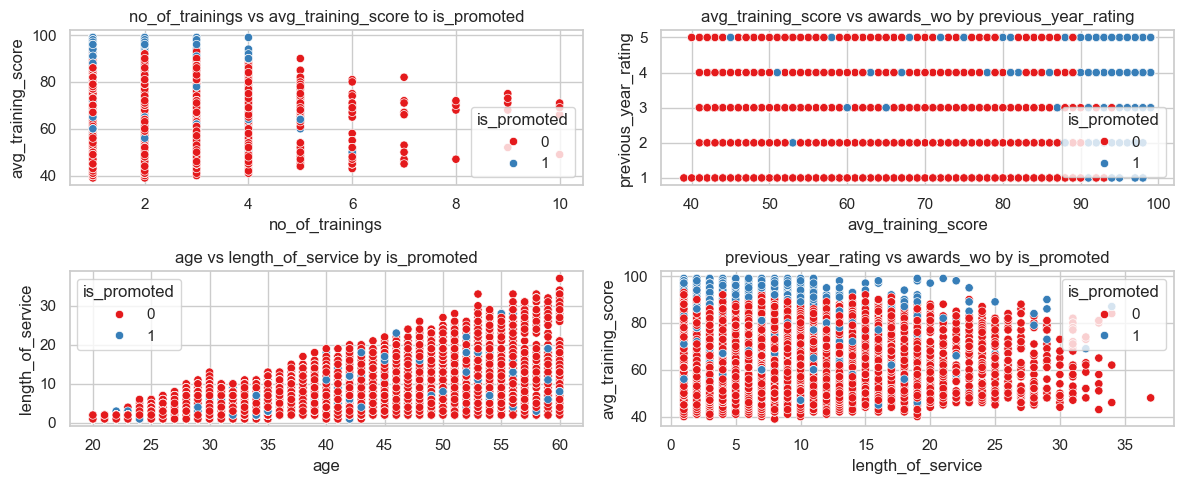

In [29]:
# Scatterplot to check if there is any separatability or not
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


sns.set_style("whitegrid")

# Create a 1x2 figure (side by side plots)
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

# Plot 1: no_of_trainings vs avg_training_score to is_promoted
g1 = sns.scatterplot(x='no_of_trainings', y='avg_training_score', hue='is_promoted', data=df, ax=axes[0,0], palette='Set1')
axes[0,0].set_title("no_of_trainings vs avg_training_score to is_promoted")

# Plot 2: avg_training_score vs awards_wo by previous_year_rating
g2 = sns.scatterplot(x='avg_training_score', y='previous_year_rating', hue='is_promoted', data=df, ax=axes[0,1], palette='Set1')
axes[0,1].set_title("avg_training_score vs awards_wo by previous_year_rating")

# Plot 1: age vs length_of_service by is_promoted
g1 = sns.scatterplot(x='age', y='length_of_service', hue='is_promoted', data=df, ax=axes[1,0], palette='Set1')
axes[1,0].set_title("age vs length_of_service by is_promoted")

# Plot 2: previous_year_rating vs awards_wo by is_promoted
g2 = sns.scatterplot(x='length_of_service', y='avg_training_score', hue='is_promoted', data=df, ax=axes[1,1], palette='Set1')
axes[1,1].set_title("previous_year_rating vs awards_wo by is_promoted")

# Adjust layout
plt.tight_layout()
plt.show()

# Interpretation:
**Truly continuous**
age
length_of_service
avg_training_score

**Discrete numeric (not continuous)***
no_of_trainings (count)
previous_year_rating (ordinal: 1–5)


**no_of_trainings vs avg_training_score::**

Vertical stripes → confirms no_of_trainings is discrete

Promotion (blue) concentrates at higher training scores and lesser number of trainings

No clear trend: more trainings ≠ higher score

**avg_training_score vs previous_year_rating**

higher score ↔ higher rating

Horizontal stripes → confirms previous_year_rating is discrete[ordinal]

**age vs length_of_service**

Length increases with age almost deterministically

Promotion does not separate cleanly here

Strong diagonal pattern

**Meaning**

Very strong correlation

High multicollinearity risk

**length_of_service vs avg_training_score**

No strong linear relationship

Long service alone does not guarantee promotion

# Conslusion from EDA:
1) Class imbalance
2) Mixed linear and non-linear relationships
3) Strong feature interactions
4) Categorical dominance in decision paths

In [95]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    VotingClassifier
)

from sklearn.pipeline import Pipeline as SkPipeline
from sklearn.svm import SVC


from sklearn.compose import ColumnTransformer
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler

# Spliitng = Train & Test

In [31]:
X = df.drop(['is_promoted'], axis=1)
y = df['is_promoted']

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43846, 11)
(10962, 11)
(43846,)
(10962,)


# Numeric & Categoric Features Splitting

In [57]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

ordinal_features = ["education"]

nominal_features = list(
    set(categorical_features) - set(ordinal_features)
)

**Education** - Ordinal in nature [Secondary Education < Bachelors < Masters degree] Category => Ordinal Encoder

**department, region, gender, recruitment_channel** - Nominal Cat Features, OHE with removing one dummy varible => Drop = "First"

In [58]:
print("\nNumeric features:", numeric_features)
print("\nordinal_features:", ordinal_features)
print("\nNominal Features:", nominal_features)


Numeric features: ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score']

ordinal_features: ['education']

Nominal Features: ['department', 'recruitment_channel', 'gender', 'region']


**Separating Features** => cardinality, data type => To create Pre_processor using Column Transformer.

# Creating Transformer => Numeric and Categorical Features

In [128]:
#Numeric: impute + scale => LR
numeric_transformer_scaled = SkPipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

#Numeric: impute => Bag, AdaBoost, Voting Classifier, DT
numeric_transformer_tree = SkPipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    
])


categorical_ohe_all = SkPipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(
        handle_unknown="ignore",
        drop="first",      
        sparse_output=False
    ))
])
#Categorical OHE, impute => LR, KNN, NB


categorical_nominal_tree = SkPipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

## Cat -> Nominal, impute => Education => DT
education_order = [
    "Below Secondary",
    "Bachelor's",
    "Master's & above"
]



categorical_ordinal_tree = SkPipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(
        categories=[education_order],
    ))
])

## Cat -> Ordinal, impute => Education => DT; Categiries - education order, Secondary followed by Bachelors and Masters.


# Creating Pre_processor for STATS Models => LG

In [118]:
# Scaling and Imputation Needed => Logistic Regression
preprocessor_lg = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_scaled, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Scaling and Imputation Needed => KNN
preprocessor_knn = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_scaled, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Scaling and Imputation Needed => NB
preprocessor_nb = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_scaled, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


# Scaling and Imputation Needed => SVC
preprocessor_svc = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_scaled, numeric_features),
        ("cat", categorical_ohe_all, categorical_features)
    ]
)

# Logistic Regression
1) It can Useful for understanding directional influence of features.
2) We can expect to underperform due to non-linear patterns observed in EDA.

# Creating Pre_processor for Computational Models => DT, RF,ET, BAG, ADA, GB

In [129]:
from sklearn.compose import ColumnTransformer

preprocessor_dt = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_tree, numeric_features),
        ("nom", categorical_nominal_tree, nominal_features),
        ("ord", categorical_ordinal_tree, ordinal_features)
    ]
)


preprocessor_rf = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_tree, numeric_features),
        ("nom", categorical_nominal_tree, nominal_features),
        ("ord", categorical_ordinal_tree, ordinal_features)
    ]
)

preprocessor_et = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_tree, numeric_features),
        ("nom", categorical_nominal_tree, nominal_features),
        ("ord", categorical_ordinal_tree, ordinal_features)
    ]
)

preprocessor_bagging = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_tree, numeric_features),
        ("nom", categorical_nominal_tree, nominal_features),
        ("ord", categorical_ordinal_tree, ordinal_features)
    ]
)


preprocessor_ada = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_tree, numeric_features),
        ("nom", categorical_nominal_tree, nominal_features),
        ("ord", categorical_ordinal_tree, ordinal_features)
    ]
)


preprocessor_gb = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_tree, numeric_features),
        ("nom", categorical_nominal_tree, nominal_features),
        ("ord", categorical_ordinal_tree, ordinal_features)
    ]
)



**we don't need a pre-processor for voting classifier, because we can directly mention the pipelines created for each models, in that**

**way, we don't have make the code fuzzy again**

# Decision Tree
1) Handles feature interactions naturally.
2) single trees is prone to overfitting, which is not acceptable under one-shot(No retraining) constraints.
3) It can Handle feature interactions naturally.

# Ensemble Models

**Bagging ( Bagging Aggregator )**

1) Reduces variance inherent in decision trees.
2) Robust to noisy categorical features.
3) Handles non-linear interactions well.
4) Expected to generalize better than a single tree.

**Boosting (AdaBoost)**

1) Sequentially corrects previous errors.
2) Effective in learning subtle promotion patterns.
3) However, boosting is sensitive to noise and class imbalance.
4) Requires careful regularization to avoid overfitting.

**Voting Classifier**
1) Combines Logistic Regression, Decision Tree (1, 2, 3 - different depths and random state).
Balances interpretability and non-linear learning.
2) Reduces reliance on a single model’s failure mode.
3) Particularly suitable for high-risk deployment scenarios just like our case scenario.

# Creating Pipeline for STATS Model

In [108]:
log_reg_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_lg),
    ("clf", LogisticRegression(
        max_iter=1000,
        random_state=42,
        class_weight="balanced"
    ))
])
# class imbalance is there, promoted(1) is minority class, to give additional weights and to get best o/p and accuracy and classification
## we are taking class_weight="balanced"


knn_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_knn),
    ("clf", KNeighborsClassifier(
        n_neighbors=5,           # No randomness = so, no random state is required
        weights="distance"       # Same data → same neighbors → same prediction
    ))
])
# Weights = "distance" , closer neighbors matter more, farther neighbors contribute less, 
# as we used scaling, it helps the overlapped classes and decision boundaries will be smooth.


nb_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_nb),
    ("clf", GaussianNB())
])

# No randomness = so, no random state is required
# Pure probability math



svc_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_lg),
    ("clf", SVC(
        kernel="rbf",
        probability=True,   
        random_state=42
    ))
])

# Probability = True, => In voting Classifier we need probabilities for voting "Soft"

# Creating Pipeline for ML Models -> DT, RF, GB, ET, Bag, ADA, VC

**creating 3 different decision trees** => For defining in Voting Classfier => Weak Learners 1, 2, 3

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
#Gini
dt_pipeline_1 = Pipeline(steps=[
    ("preprocess", preprocessor_dt),
    ("clf", DecisionTreeClassifier(
        criterion="gini",
        max_depth=3,
        random_state=42
    ))
])


#ENtropy
dt_pipeline_2 = Pipeline(steps=[
    ("preprocess", preprocessor_dt),
    ("clf", DecisionTreeClassifier(
        criterion="entropy",
        max_depth=6,
        random_state=42
    ))
])


#Gini
dt_pipeline_3 = Pipeline(steps=[
    ("preprocess", preprocessor_dt),
    ("clf", DecisionTreeClassifier(
        criterion="gini",
        max_depth=5,
        random_state=42
    ))
])


# We need to define Base Estimators => For Bagging(Bootstrap Aggregator) && AdaBoost => as Decision Tree
bag_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_bagging),
    ("clf", BaggingClassifier(
        estimator=DecisionTreeClassifier(
            random_state=42
        ),
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

ada_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_ada),
    ("clf", AdaBoostClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=1,
            random_state=42
        ),
        n_estimators=100,
        learning_rate=0.5,
        random_state=42
    ))
])


## RF && ET => Default is Decision Tree

rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_rf),
    ("clf", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])


et_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_et),
    ("clf", ExtraTreesClassifier(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])



gb_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_gb),
    ("clf", GradientBoostingClassifier(
        n_estimators=150,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])


# Creating VC Pipeline 

In [131]:
from sklearn.ensemble import VotingClassifier

voting_pipeline = VotingClassifier(
    estimators=[
        ("lr", log_reg_pipeline),
        ("knn", knn_pipeline),
        ("nb", nb_pipeline),
        ("svc", svc_pipeline),
        ("dt1", dt_pipeline_1),
        ("dt2", dt_pipeline_2),
        ("dt3", dt_pipeline_3),
    ],
    voting="soft"
)


# Does not train a model itself
# Only aggregates predictions - No Randomness


# Fitting the Model

**STATS MODEL**

In [139]:
log_reg_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [154]:
knn_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [158]:
nb_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [161]:
svc_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Computational Models - DT, Ensemble Models - Bag, Ada, RF, ET, GB, VC 

In [142]:
dt_pipeline_1.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [143]:
bag_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [144]:
rf_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [135]:
et_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [136]:
gb_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [133]:
ada_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [146]:
voting_pipeline.fit(X_train, y_train)

,estimators,"[('lr', ...), ('knn', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None


# Predicting Y Features

In [162]:
    # Logistic Regression
y_train_pred_lr = log_reg_pipeline.predict(X_train)
y_test_pred_lr  = log_reg_pipeline.predict(X_test)

y_train_pred_knn = knn_pipeline.predict(X_train)
y_test_pred_knn  = knn_pipeline.predict(X_test)

y_train_pred_nb = nb_pipeline.predict(X_train)
y_test_pred_nb = nb_pipeline.predict(X_test)

y_train_pred_svc = svc_pipeline.predict(X_train)
y_test_pred_svc  = svc_pipeline.predict(X_test)


In [147]:
# Decision Tree
y_train_pred_dt = dt_pipeline_1.predict(X_train)
y_test_pred_dt  = dt_pipeline_1.predict(X_test)


# Random Forest
y_train_pred_rf = rf_pipeline.predict(X_train)
y_test_pred_rf  = rf_pipeline.predict(X_test)


# Extra Trees Classifier
y_train_pred_et = et_pipeline.predict(X_train)
y_test_pred_et  = et_pipeline.predict(X_test)


# Gradient Boost 
y_train_pred_gb = gb_pipeline.predict(X_train)
y_test_pred_gb  = gb_pipeline.predict(X_test)


# Bagging
y_train_pred_bag = bag_pipeline.predict(X_train)
y_test_pred_bag  = bag_pipeline.predict(X_test)


# AdaBoost
y_train_pred_ada = ada_pipeline.predict(X_train)
y_test_pred_ada  = ada_pipeline.predict(X_test)


# Voting Classifier
y_train_pred_vc = voting_pipeline.predict(X_train)
y_test_pred_vc  = voting_pipeline.predict(X_test)

# Accuracy and Cofusion Matrix


--- Logistic Regression ---
Train Accuracy: 0.7610956529672034
Test Accuracy : 0.7585294654260172


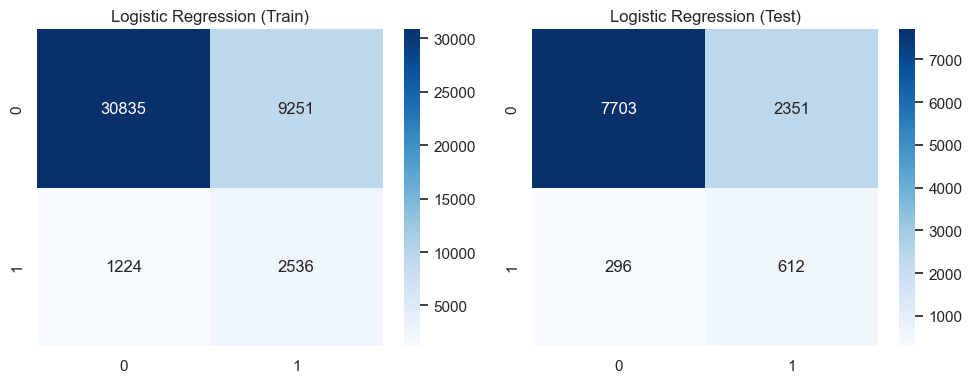

In [148]:
print("\n--- Logistic Regression ---")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_lr))

fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression (Train)')
sns.heatmap(confusion_matrix(y_test, y_test_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Logistic Regression (Test)')
plt.tight_layout()
plt.show()



--- KNN ---
Train Accuracy: 0.9995438580486248
Test Accuracy : 0.9166210545520891


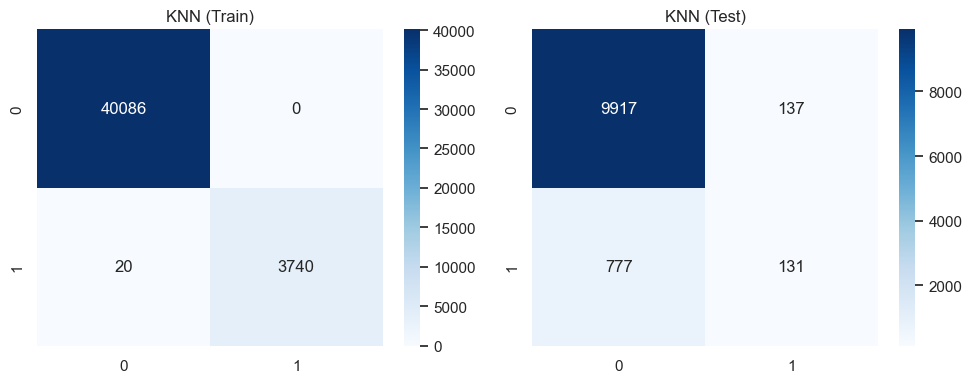

In [156]:
print("\n--- KNN ---")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_knn))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_knn))

fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_knn), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('KNN (Train)')
sns.heatmap(confusion_matrix(y_test, y_test_pred_knn), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('KNN (Test)')
plt.tight_layout()
plt.show()



--- Naive Bayes ---
Train Accuracy: 0.3034712402499658
Test Accuracy : 0.2990330231709542


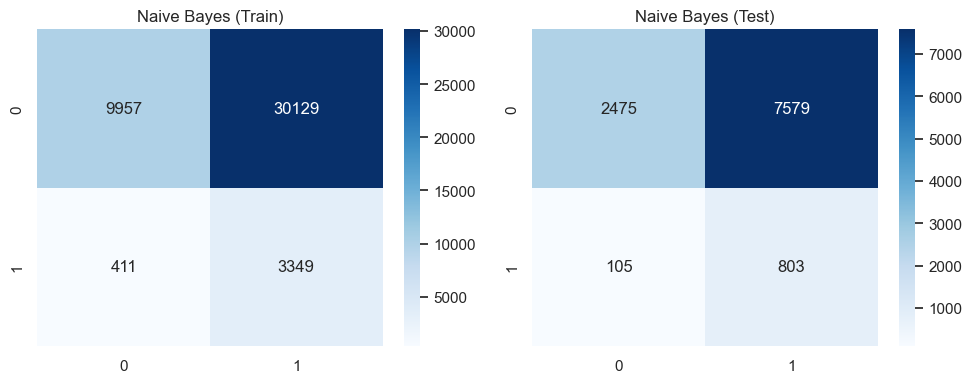

In [160]:
print("\n--- Naive Bayes ---")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_nb))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_nb))

fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_nb), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Naive Bayes (Train)')
sns.heatmap(confusion_matrix(y_test, y_test_pred_nb), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Naive Bayes (Test)')
plt.tight_layout()
plt.show()



--- Support Vectore Classifier ---
Train Accuracy: 0.928568170414633
Test Accuracy : 0.9290275497172049


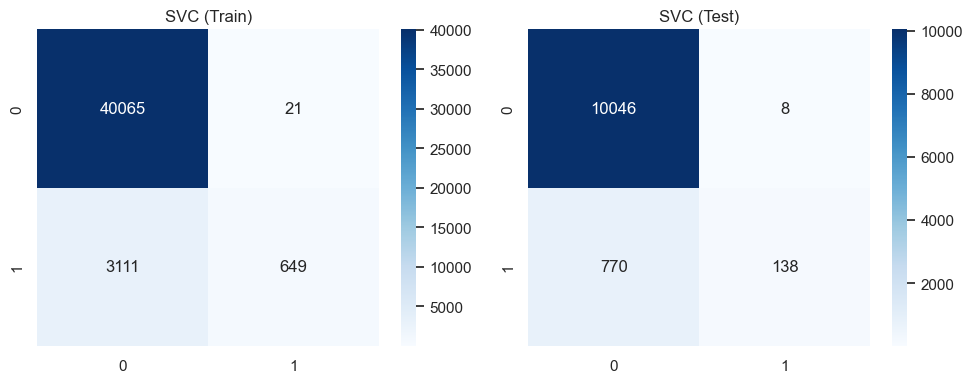

In [163]:
print("\n--- Support Vectore Classifier ---")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_svc))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_svc))

fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_svc), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('SVC (Train)')
sns.heatmap(confusion_matrix(y_test, y_test_pred_svc), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('SVC (Test)')
plt.tight_layout()
plt.show()


--- Decision Tree ---
Train Accuracy: 0.9238699083154678
Test Accuracy : 0.9258347016967706


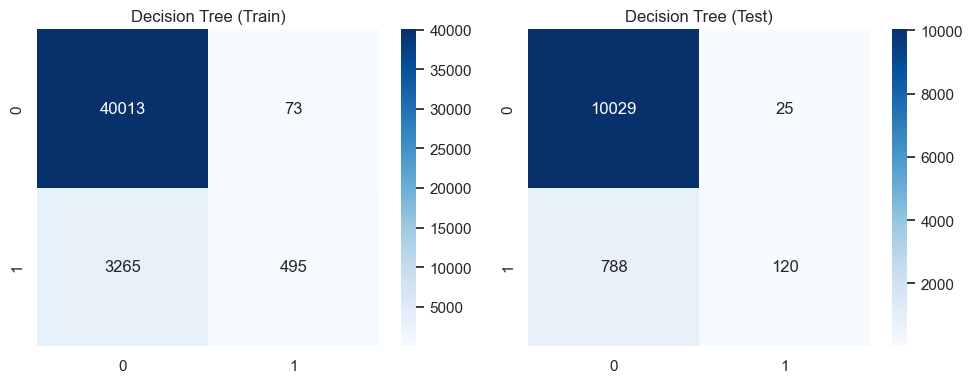

In [164]:
print("\n--- Decision Tree ---")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_dt))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_dt))

fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_dt), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Tree (Train)')
sns.heatmap(confusion_matrix(y_test, y_test_pred_dt), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Decision Tree (Test)')
plt.tight_layout()
plt.show()



--- Bagging Classifier ---
Train Accuracy: 0.9994070154632122
Test Accuracy : 0.9374201787994891


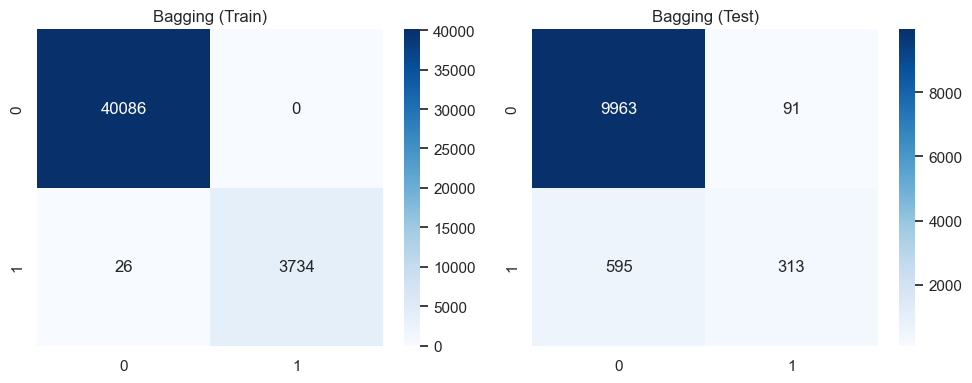

In [165]:
print("\n--- Bagging Classifier ---")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_bag))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_bag))

fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_bag), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Bagging (Train)')
sns.heatmap(confusion_matrix(y_test, y_test_pred_bag), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Bagging (Test)')
plt.tight_layout()
plt.show()



--- AdaBoost ---
Train Accuracy: 0.9226155179491858
Test Accuracy : 0.9256522532384601


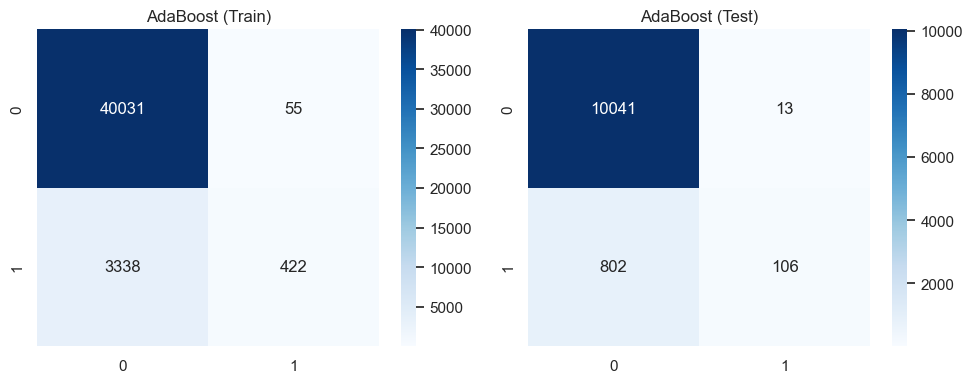

In [166]:
print("\n--- AdaBoost ---")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_ada))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_ada))

fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_ada), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('AdaBoost (Train)')
sns.heatmap(confusion_matrix(y_test, y_test_pred_ada), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('AdaBoost (Test)')
plt.tight_layout()
plt.show()



--- Voting Classifier ---
Train Accuracy: 0.9435296264197418
Test Accuracy : 0.9319467250501733


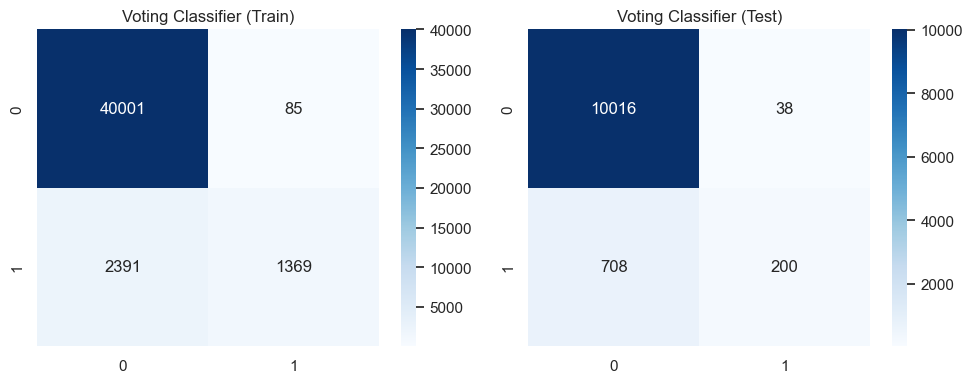

In [167]:
print("\n--- Voting Classifier ---")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_vc))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_vc))

fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_vc), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Voting Classifier (Train)')
sns.heatmap(confusion_matrix(y_test, y_test_pred_vc), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Voting Classifier (Test)')
plt.tight_layout()
plt.show()


# K-FOLD CV

In [168]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=10
)


In [169]:
models = {
    
    "Logistic Regression": log_reg_pipeline,
    "KNN": knn_pipeline,
    "Naive Bayes": nb_pipeline,
    "SVC": svc_pipeline,

    "Decision Tree (Gini, depth=3)": dt_pipeline_1,

    "Bagging": bag_pipeline,
    "AdaBoost": ada_pipeline,
    "Random Forest": rf_pipeline,
    "Extra Trees": et_pipeline,
    "Gradient Boosting": gb_pipeline,

    "Voting Classifier": voting_pipeline
}


In [170]:
cv_results = []

for name, pipeline in models.items():

    # Cross-validation on training data only
    cv_scores = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1
    )

    # Fit on full training set
    pipeline.fit(X_train, y_train)

    # Training accuracy
    train_acc = accuracy_score(
        y_train,
        pipeline.predict(X_train)
    )

    # Test accuracy
    test_acc = accuracy_score(
        y_test,
        pipeline.predict(X_test)
    )

    # Store results
    cv_results.append({
        "Model": name,
        "Mean CV Accuracy": cv_scores.mean(),
        "Std CV Accuracy": cv_scores.std(),
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc
    })


In [171]:
# RESULTS SUMMARY


cv_summary = (
    pd.DataFrame(cv_results)
    .sort_values(by="Mean CV Accuracy", ascending=False)
)

pd.set_option("display.float_format", lambda x: f"{x:.4f}")
display(cv_summary)

,Model,Mean CV Accuracy,Std CV Accuracy,Train Accuracy,Test Accuracy
9,Gradient Boosting,0.9406,0.0006,0.9416,0.9423
5,Bagging,0.9369,0.0008,0.9994,0.9374
7,Random Forest,0.9339,0.0009,0.9995,0.9367
8,Extra Trees,0.9296,0.0013,0.9995,0.9309
10,Voting Classifier,0.9278,0.0008,0.9435,0.9319
3,SVC,0.9265,0.0008,0.9286,0.9290
6,AdaBoost,0.9226,0.0010,0.9226,0.9257
4,"Decision Tree (Gini, depth=3)",0.9226,0.0006,0.9239,0.9258
1,KNN,0.9142,0.0013,0.9995,0.9166
0,Logistic Regression,0.7598,0.0046,0.7611,0.7585


# bias–variance–aware rule

**Decision Trees** - Very tight alignment, Almost no overfitting, Stable generalization.

**Logistic Regression** - Tight alignment, Stable but underfitting,

**Bagging** - High train–CV gap - Moderate Overfitting

**Voting Classifier** - Moderate alignment

**adaboost**, **SVC** - can be taken as 2nd place.

**Decision Trees** - If the client wants to implement only the single model then we can choose, **decision trees** or **SVC**.


**TIGHT ALIGNMENT** = high CV mean + low CV std + small train – test gap [All around the range of Mean CV]

# Best model for deployment

I vouch for Gradient Boosting: Mean CV Accuracy - 0.9406, Std CV Accuracy - 0.0006, Train Accuracy - 0.9416, Test Accuracy - 0.9423.

1) Lowest variance
2) Train ~ Test => excellent generalization
3) No overfitting

**Voting Classifier** and **Decision Tree** are preferred models, as their accuracies closely align with the K-fold mean accuracy, indicating better generalization.


# Comparative performance across single and ensemble models

1) **Decision trees** - A strong standalone performer. It competes surprisingly well with AdaBoost, but lacks the extra polish ensembles provide. 

2) **Logistic Regression** - It is a good model, But it don't have high accuracy as compared with Decision Trees.
Linear models will have high stability 

# Overfitting and stability analysis

1) **Bagging, Random Forest and Extra Trees** - stability is good, But it memorizes in Training and getting Overfitted.
2) **Logistic Regression** - More stable but accouracy is poor.
3) **Naive Bayes** - As a single model it failed to predict True Positives and True Negatives, But it contributes as a weak learner in Voting Classifier.